## TOC:
* [Initializing](#Init)
* [Cleaning](#Cleaning)

In [38]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [7]:
def removeOutliers(df, Zscore, district):
        
    bins = 100
    alpha = 0.5
    
    print('District {}:\n\n'.format(district))
    print('Before:\n')
    plt.hist(df['_source.price'], bins=100, alpha=alpha, label='orig')
    print(df.describe())
    
    print('\nAfter:\n')
    sourcePriceMean = df['_source.price'].mean()
    dfOrigSize = df.shape[0]
    dfOutliers = df[np.abs(df['_source.price']-sourcePriceMean)>(Zscore*df['_source.price'].std())]
    df = df[np.abs(df['_source.price']-sourcePriceMean)<=(Zscore*df['_source.price'].std())]
    plt.hist(df['_source.price'], bins, alpha=alpha, label='cleaned')
    plt.show()
    print(df.describe())
    print('{} ads removed from {}'.format(dfOutliers.shape[0], dfOrigSize))
    
    return df

Getting the data from elastic into a pandas dataframe:

In [8]:
es = Elasticsearch()
scanResult=scan(es,
    query={"query": {"match_all": {}}},
    index="ingatlanok-2017-11-13",
    doc_type="IngatlanstatsItem",
    preserve_order=True
)
df = json_normalize(list(scanResult))

# Cleaning <a class="anchor" id="first-bullet"></a>

Removing ads with 0 size:

In [9]:
dfZeroSize = df[df['_source.size'] == 0]
print('{} ads removed.'.format(dfZeroSize.shape[0]))
df = df[df['_source.size'] != 0]

0 ads removed.


Removing outliers:

District I:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  1424.0    1424.000000        1424.000000   1424.000000
mean      1.0      68.301433           2.460674     77.275281
std       0.0      93.919075           1.316365     43.195027
min       1.0      11.900000           1.000000     12.000000
25%       1.0      37.875000           2.000000     53.000000
50%       1.0      48.000000           2.500000     69.000000
75%       1.0      70.357500           3.000000     90.250000
max       1.0    1839.680000          22.500000    600.000000

After:



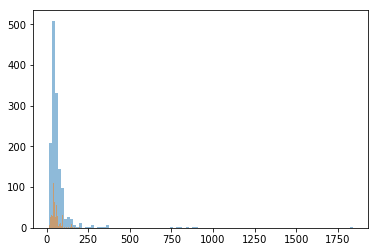

       _score  _source.price  _source.roomCount  _source.size
count  1375.0    1375.000000        1375.000000   1375.000000
mean      1.0      55.269607           2.372727     72.583273
std       0.0      29.259412           1.136988     30.511007
min       1.0      11.900000           1.000000     12.000000
25%       1.0      37.250000           1.500000     52.000000
50%       1.0      47.900000           2.000000     66.000000
75%       1.0      64.945000           3.000000     88.000000
max       1.0     207.000000          22.500000    270.000000
49 ads removed from 1424


In [10]:
dfRemovedOutliersDistrictI = removeOutliers(df[df['_source.district']=='I'], 1.5, 'I')

District II:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  3429.0    3429.000000        3429.000000   3429.000000
mean      1.0      69.032394           2.875036     93.093030
std       0.0      44.508984           1.399513     51.166735
min       1.0       4.900000           1.000000      1.000000
25%       1.0      39.000000           2.000000     62.000000
50%       1.0      56.500000           3.000000     83.000000
75%       1.0      84.900000           3.500000    115.000000
max       1.0     475.000000          43.000000    844.000000

After:



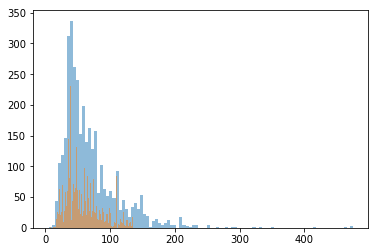

       _score  _source.price  _source.roomCount  _source.size
count  3138.0    3138.000000        3138.000000   3138.000000
mean      1.0      59.116938           2.700287     84.754621
std       0.0      27.161019           1.015244     34.390615
min       1.0       4.900000           1.000000      1.000000
25%       1.0      38.800000           2.000000     61.000000
50%       1.0      51.900000           2.500000     79.000000
75%       1.0      75.000000           3.000000    103.000000
max       1.0     135.000000           9.000000    273.000000
291 ads removed from 3429


In [11]:
dfRemovedOutliersDistrictII = removeOutliers(df[df['_source.district']=='II'], 1.5, 'II')

District III:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  3676.0    3676.000000        3676.000000   3676.000000
mean      1.0      42.838711           2.512106     72.088955
std       0.0      27.607432           0.958983     33.885248
min       1.0       1.500000           0.000000      7.000000
25%       1.0      23.000000           2.000000     50.000000
50%       1.0      34.650000           2.000000     66.000000
75%       1.0      54.900000           3.000000     83.000000
max       1.0     285.000000          15.000000    700.000000

After:



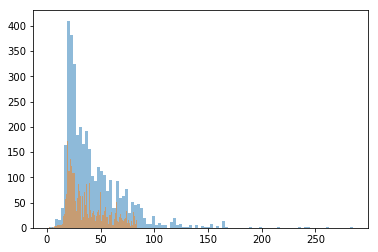

       _score  _source.price  _source.roomCount  _source.size
count  3415.0    3415.000000        3415.000000   3415.000000
mean      1.0      37.492237           2.395315     66.711567
std       0.0      18.074627           0.838937     26.392285
min       1.0       1.500000           0.000000      7.000000
25%       1.0      22.595000           2.000000     50.000000
50%       1.0      31.900000           2.000000     62.000000
75%       1.0      49.500000           3.000000     79.000000
max       1.0      84.000000          15.000000    700.000000
261 ads removed from 3676


In [12]:
dfRemovedOutliersDistrictIII = removeOutliers(df[df['_source.district']=='III'], 1.5, 'III')

District IV:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  1940.0    1940.000000        1940.000000   1940.000000
mean      1.0      26.721933           2.283763     61.927320
std       0.0      10.708150           1.110580     21.486851
min       1.0       3.300000           1.000000     15.000000
25%       1.0      19.500000           2.000000     49.000000
50%       1.0      24.345000           2.000000     60.000000
75%       1.0      33.890000           2.500000     72.000000
max       1.0     108.500000          33.000000    187.000000

After:



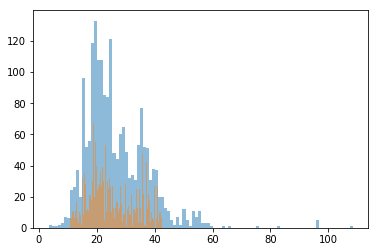

       _score  _source.price  _source.roomCount  _source.size
count  1797.0    1797.000000        1797.000000   1797.000000
mean      1.0      25.207201           2.198664     59.623261
std       0.0       7.869474           1.068786     18.681869
min       1.0      10.700000           1.000000     16.000000
25%       1.0      19.420000           2.000000     47.000000
50%       1.0      23.500000           2.000000     60.000000
75%       1.0      31.000000           2.500000     71.000000
max       1.0      42.600000          33.000000    150.000000
143 ads removed from 1940


In [13]:
dfRemovedOutliersDistrictIV = removeOutliers(df[df['_source.district']=='IV'], 1.5, 'IV')

District V:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  3570.0    3570.000000        3570.000000   3570.000000
mean      1.0      83.510762           2.546499     85.086835
std       0.0      59.994335           1.292507     47.209741
min       1.0       9.900000           0.500000      8.000000
25%       1.0      44.900000           2.000000     55.000000
50%       1.0      65.900000           2.500000     75.000000
75%       1.0      99.975000           3.000000    104.000000
max       1.0     610.000000          22.000000    610.000000

After:



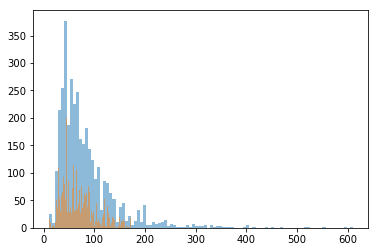

       _score  _source.price  _source.roomCount  _source.size
count  3317.0    3317.000000        3317.000000    3317.00000
mean      1.0      70.869316           2.396141      78.09798
std       0.0      33.937749           1.022879      36.34405
min       1.0       9.900000           0.500000       8.00000
25%       1.0      44.000000           2.000000      53.00000
50%       1.0      63.900000           2.000000      72.00000
75%       1.0      89.900000           3.000000      98.00000
max       1.0     171.500000          12.000000     329.00000
253 ads removed from 3570


In [14]:
dfRemovedOutliersDistrictV = removeOutliers(df[df['_source.district']=='V'], 1.5, 'V')

District VI:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  4914.0    4914.000000        4914.000000   4914.000000
mean      1.0      56.227291           2.456858     77.781848
std       0.0      42.600032           1.149018     40.306146
min       1.0       5.400000           0.500000      9.000000
25%       1.0      29.900000           2.000000     50.000000
50%       1.0      44.900000           2.000000     72.000000
75%       1.0      64.900000           3.000000     98.000000
max       1.0     623.620000          33.000000    630.000000

After:



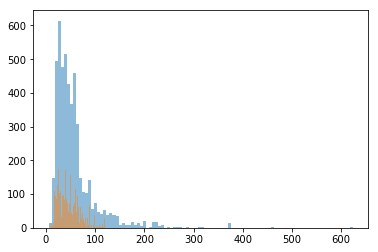

       _score  _source.price  _source.roomCount  _source.size
count  4575.0    4575.000000        4575.000000   4575.000000
mean      1.0      47.452638           2.333115     71.732022
std       0.0      23.180198           0.943511     30.764233
min       1.0       5.400000           0.500000      9.000000
25%       1.0      29.400000           2.000000     49.000000
50%       1.0      42.800000           2.000000     69.000000
75%       1.0      59.900000           3.000000     93.000000
max       1.0     120.000000          15.000000    500.000000
339 ads removed from 4914


In [15]:
dfRemovedOutliersDistrictVI = removeOutliers(df[df['_source.district']=='VI'], 1.5, 'VI')

District VII:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  5803.0    5803.000000        5803.000000   5803.000000
mean      1.0      38.259495           2.206790     66.493710
std       0.0      21.067066           1.158192     35.374825
min       1.0       4.400000           0.500000     10.000000
25%       1.0      24.795000           1.500000     43.000000
50%       1.0      33.000000           2.000000     61.000000
75%       1.0      45.290000           3.000000     85.000000
max       1.0     229.800000          29.000000    773.000000

After:



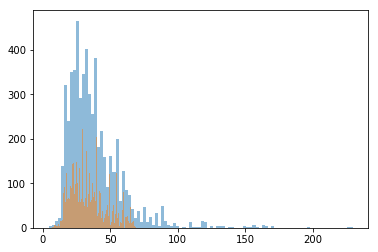

       _score  _source.price  _source.roomCount  _source.size
count  5434.0    5434.000000        5434.000000   5434.000000
mean      1.0      34.362409           2.062201     61.996503
std       0.0      13.236421           0.854280     25.945613
min       1.0       6.700000           0.500000     10.000000
25%       1.0      23.900000           1.500000     42.000000
50%       1.0      32.000000           2.000000     58.000000
75%       1.0      42.890000           2.500000     79.000000
max       1.0      69.500000           8.000000    162.000000
369 ads removed from 5803


In [16]:
dfRemovedOutliersDistrictVII = removeOutliers(df[df['_source.district']=='VII'], 1.5, 'VII')

District VIII:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  4335.0    4335.000000        4335.000000   4335.000000
mean      1.0      29.987765           2.134141     64.181776
std       0.0      22.528671           1.334748     43.138455
min       1.0       3.000000           0.500000     10.000000
25%       1.0      18.900000           1.500000     41.000000
50%       1.0      26.700000           2.000000     58.000000
75%       1.0      35.500000           2.500000     78.000000
max       1.0    1080.000000          46.000000    902.000000

After:



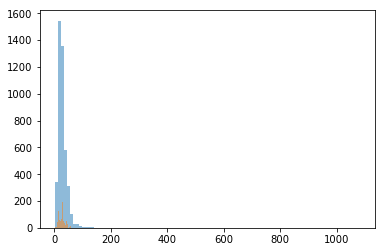

       _score  _source.price  _source.roomCount  _source.size
count  4199.0    4199.000000        4199.000000   4199.000000
mean      1.0      27.927547           2.053227     60.683972
std       0.0      11.679978           0.957575     25.722776
min       1.0       3.000000           0.500000     10.000000
25%       1.0      18.900000           1.500000     41.000000
50%       1.0      25.900000           2.000000     57.000000
75%       1.0      34.900000           2.500000     76.000000
max       1.0      63.000000          31.000000    180.000000
136 ads removed from 4335


In [17]:
dfRemovedOutliersDistrictVIII = removeOutliers(df[df['_source.district']=='VIII'], 1.5, 'VIII')

District IX:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  3094.0    3094.000000        3094.000000   3094.000000
mean      1.0      41.132624           2.292017     71.526180
std       0.0      25.227522           0.988442     38.445116
min       1.0       4.000000           0.500000     16.000000
25%       1.0      25.500000           1.500000     49.000000
50%       1.0      34.810000           2.000000     66.000000
75%       1.0      49.900000           3.000000     83.000000
max       1.0     515.000000          22.000000    997.000000

After:



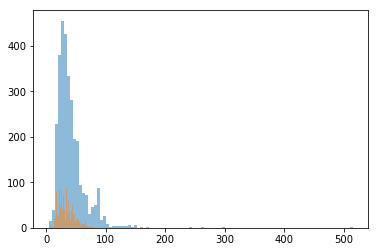

       _score  _source.price  _source.roomCount  _source.size
count  2828.0    2828.000000        2828.000000   2828.000000
mean      1.0      35.632472           2.194307     65.592291
std       0.0      14.325566           0.843938     23.934728
min       1.0       4.000000           0.500000     16.000000
25%       1.0      24.900000           1.500000     49.000000
50%       1.0      33.500000           2.000000     63.000000
75%       1.0      44.250000           3.000000     78.000000
max       1.0      77.900000           5.500000    185.000000
266 ads removed from 3094


In [18]:
dfRemovedOutliersDistrictIX = removeOutliers(df[df['_source.district']=='IX'], 1.5, 'IX')

District X:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  1091.0    1091.000000        1091.000000   1091.000000
mean      1.0      22.128075           2.162236     57.884510
std       0.0      11.071777           0.869875     25.300822
min       1.0       3.850000           1.000000     24.000000
25%       1.0      16.700000           1.500000     46.000000
50%       1.0      19.900000           2.000000     55.000000
75%       1.0      24.700000           2.500000     65.000000
max       1.0     176.700000          10.000000    498.000000

After:



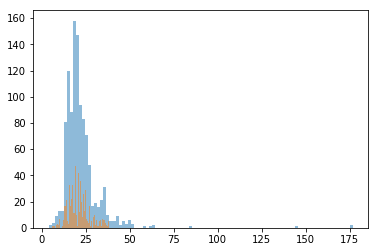

       _score  _source.price  _source.roomCount  _source.size
count  1043.0    1043.000000        1043.000000   1043.000000
mean      1.0      20.706405           2.081975     55.805369
std       0.0       6.019675           0.738794     18.988771
min       1.0       6.000000           1.000000     24.000000
25%       1.0      16.500000           1.500000     45.000000
50%       1.0      19.900000           2.000000     54.000000
75%       1.0      23.990000           2.500000     64.000000
max       1.0      38.170000           5.500000    156.000000
48 ads removed from 1091


In [19]:
dfRemovedOutliersDistrictX = removeOutliers(df[df['_source.district']=='X'], 1.5, 'X')

District XI:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  3845.0    3845.000000        3845.000000   3845.000000
mean      1.0      48.914052           2.524317     74.402081
std       0.0      30.722846           1.110209     37.818328
min       1.0       8.500000           0.500000      2.000000
25%       1.0      29.400000           2.000000     51.000000
50%       1.0      38.900000           2.500000     65.000000
75%       1.0      59.570000           3.000000     91.000000
max       1.0     297.200000          17.000000    750.000000

After:



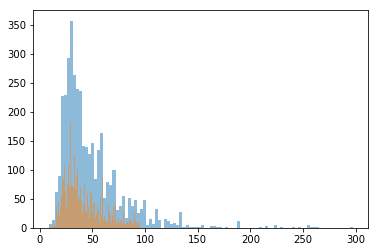

       _score  _source.price  _source.roomCount  _source.size
count  3557.0    3557.000000        3557.000000   3557.000000
mean      1.0      42.530323           2.401181     68.420017
std       0.0      18.694106           0.980550     26.729168
min       1.0       8.500000           0.500000      2.000000
25%       1.0      28.490000           2.000000     50.000000
50%       1.0      37.300000           2.000000     62.000000
75%       1.0      54.900000           3.000000     83.000000
max       1.0      94.900000          17.000000    214.000000
288 ads removed from 3845


In [20]:
dfRemovedOutliersDistrictXI = removeOutliers(df[df['_source.district']=='XI'], 1.5, 'XI')

District XII:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  2379.0    2379.000000        2379.000000   2379.000000
mean      1.0      64.947663           2.767970     91.494746
std       0.0      51.219320           1.172545     51.990880
min       1.0       8.500000           0.000000     13.000000
25%       1.0      36.000000           2.000000     57.000000
50%       1.0      45.950000           2.500000     78.000000
75%       1.0      79.000000           3.500000    110.000000
max       1.0    1247.240000           9.000000    453.000000

After:



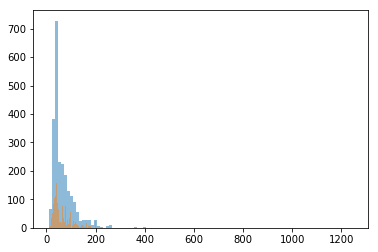

       _score  _source.price  _source.roomCount  _source.size
count  2352.0    2352.000000        2352.000000   2352.000000
mean      1.0      62.060923           2.745961     89.020833
std       0.0      38.778771           1.153557     45.821051
min       1.0       8.500000           0.000000     13.000000
25%       1.0      35.900000           2.000000     57.000000
50%       1.0      45.750000           2.500000     78.000000
75%       1.0      78.700000           3.000000    108.000000
max       1.0     215.000000           8.500000    453.000000
27 ads removed from 2379


In [22]:
dfRemovedOutliersDistrictXII = removeOutliers(df[df['_source.district']=='XII'], 3, 'XII')

District XIII:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  6328.0    6328.000000        6328.000000   6328.000000
mean      1.0      40.631873           2.230642     64.635272
std       0.0      23.841069           0.882735     27.919113
min       1.0       4.000000           0.500000      1.000000
25%       1.0      25.792500           1.500000     46.000000
50%       1.0      34.400000           2.000000     59.000000
75%       1.0      48.725000           3.000000     75.000000
max       1.0     436.530000          14.000000    414.000000

After:



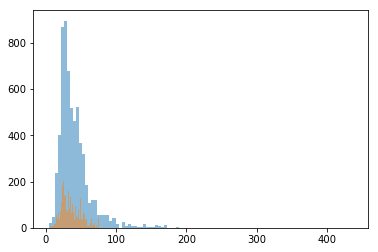

       _score  _source.price  _source.roomCount  _source.size
count  5915.0    5915.000000        5915.000000   5915.000000
mean      1.0      36.046103           2.138208     60.783432
std       0.0      14.168602           0.789180     22.685614
min       1.0       5.800000           0.500000      1.000000
25%       1.0      25.000000           1.500000     46.000000
50%       1.0      33.000000           2.000000     58.000000
75%       1.0      45.000000           2.500000     71.000000
max       1.0      76.000000           9.000000    194.000000
413 ads removed from 6328


In [23]:
dfRemovedOutliersDistrictXIII = removeOutliers(df[df['_source.district']=='XIII'], 1.5, 'XIII')

District XIV:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  3966.0    3966.000000        3966.000000   3966.000000
mean      1.0      31.131697           2.210414     63.591276
std       0.0      15.151697           0.925151     27.348715
min       1.0       5.900000           0.500000      6.000000
25%       1.0      20.800000           1.500000     46.000000
50%       1.0      26.900000           2.000000     56.000000
75%       1.0      36.900000           3.000000     75.000000
max       1.0     180.000000           9.000000    286.000000

After:



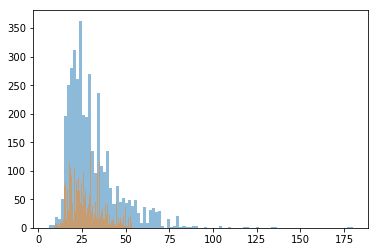

       _score  _source.price  _source.roomCount  _source.size
count  3616.0    3616.000000        3616.000000   3616.000000
mean      1.0      27.747500           2.066648     58.428927
std       0.0       9.554905           0.773692     19.985373
min       1.0       8.900000           0.500000      6.000000
25%       1.0      19.990000           1.500000     46.000000
50%       1.0      25.900000           2.000000     55.000000
75%       1.0      34.000000           2.500000     69.000000
max       1.0      53.500000           8.000000    221.000000
350 ads removed from 3966


In [24]:
dfRemovedOutliersDistrictXIV = removeOutliers(df[df['_source.district']=='XIV'], 1.5, 'XIV')

District XV:


Before:

       _score  _source.price  _source.roomCount  _source.size
count  1186.0    1186.000000        1186.000000   1186.000000
mean      1.0      21.707302           2.241147     59.532884
std       0.0       8.356713           0.887338     25.751739
min       1.0       4.000000           0.500000      8.000000
25%       1.0      17.900000           1.500000     47.000000
50%       1.0      19.900000           2.000000     55.000000
75%       1.0      23.490000           2.875000     68.000000
max       1.0     110.000000          12.500000    413.000000

After:



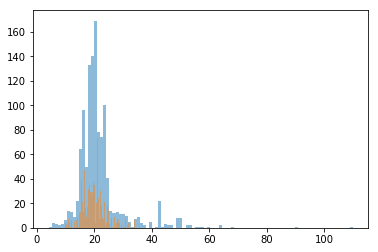

       _score  _source.price  _source.roomCount  _source.size
count  1094.0    1094.000000        1094.000000   1094.000000
mean      1.0      20.061024           2.112888     55.490859
std       0.0       4.051286           0.659790     15.213498
min       1.0       9.280000           1.000000     20.000000
25%       1.0      17.700000           1.500000     46.000000
50%       1.0      19.800000           2.000000     55.000000
75%       1.0      22.500000           2.500000     66.000000
max       1.0      34.000000           4.000000    195.000000
92 ads removed from 1186


In [25]:
dfRemovedOutliersDistrictXV = removeOutliers(df[df['_source.district']=='XV'], 1.5, 'XV')

District XVI:


Before:

       _score  _source.price  _source.roomCount  _source.size
count   606.0     606.000000         606.000000    606.000000
mean      1.0      32.761733           2.651815     78.085809
std       0.0      15.983059           1.070285     38.095216
min       1.0       6.500000           1.000000     20.000000
25%       1.0      21.860000           2.000000     50.000000
50%       1.0      26.500000           2.500000     67.000000
75%       1.0      41.400000           3.000000    102.000000
max       1.0      96.000000           5.500000    397.000000

After:



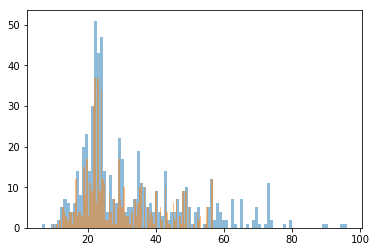

       _score  _source.price  _source.roomCount  _source.size
count   544.0     544.000000         544.000000    544.000000
mean      1.0      28.863401           2.473346     71.180147
std       0.0      10.948350           0.929726     30.885827
min       1.0       9.600000           1.000000     20.000000
25%       1.0      21.500000           2.000000     50.000000
50%       1.0      24.050000           2.000000     64.000000
75%       1.0      35.500000           3.000000     82.000000
max       1.0      56.600000           5.500000    180.000000
62 ads removed from 606


In [26]:
dfRemovedOutliersDistrictXVI = removeOutliers(df[df['_source.district']=='XVI'], 1.5, 'XVI')

Add column "priceSquareMeter":

In [27]:
df['priceSquareMeter'] = df['_source.price']/df['_source.size']
df.describe()

_score  _source.price  _source.roomCount  _source.size  \
count  55357.0   55357.000000       55357.000000  55357.000000   
mean       1.0      44.717424           2.373747     71.547284   
std        0.0      38.418108           1.126470     38.689726   
min        1.0       1.500000           0.000000      1.000000   
25%        1.0      23.500000           2.000000     49.000000   
50%        1.0      34.700000           2.000000     64.000000   
75%        1.0      52.900000           3.000000     85.000000   
max        1.0    1839.680000          46.000000    997.000000   

       priceSquareMeter  
count      55357.000000  
mean           0.608591  
std            0.342028  
min            0.014286  
25%            0.442623  
50%            0.565849  
75%            0.714725  
max           38.900000

In [28]:
dfPriceCountDistrict = df.groupby('_source.district')['priceSquareMeter'].agg(['count', 'mean']).sort_values(by='mean', ascending=False).reset_index()

In [29]:
print(dfPriceCountDistrict)

   _source.district  count      mean
0                 V   3570  0.975558
1                 I   1424  0.822821
2                II   3429  0.741130
3                VI   4914  0.707330
4               XII   2379  0.695571
5                XI   3845  0.656274
6              XIII   6328  0.628654
7               VII   5803  0.594644
8               III   3676  0.579157
9                IX   3094  0.577599
10              XIV   3966  0.494583
11             VIII   4335  0.487526
12               IV   1940  0.439964
13             XXII    433  0.434764
14              XVI    606  0.429494
15            XVIII    952  0.395506
16                X   1091  0.392502
17             XVII    392  0.386712
18               XV   1186  0.375716
19               XX    796  0.375573
20              XIX    577  0.370174
21            XXIII     98  0.334523
22              XXI    523  0.326743


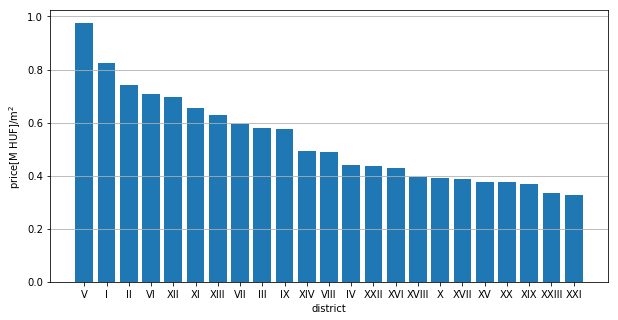

In [30]:
index = np.arange(len(dfPriceCountDistrict['_source.district']))
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(index, dfPriceCountDistrict['mean'])
plt.xticks(index, list(dfPriceCountDistrict['_source.district']))
plt.xlabel('district')
plt.ylabel('price[M HUF]/m$^2$')
ax.yaxis.grid()
plt.show()

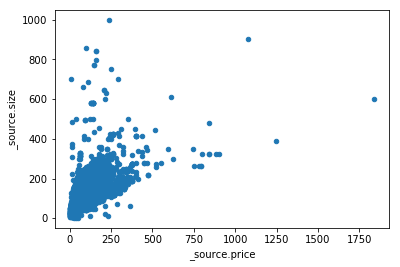

In [34]:
df.plot(kind='scatter', x = '_source.price', y = '_source.size')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55357 entries, 0 to 55356
Data columns (total 10 columns):
_id                  55357 non-null object
_index               55357 non-null object
_score               55357 non-null float64
_source.address      55357 non-null object
_source.district     55357 non-null object
_source.price        55357 non-null float64
_source.roomCount    55357 non-null float64
_source.size         55357 non-null float64
_type                55357 non-null object
priceSquareMeter     55357 non-null float64
dtypes: float64(5), object(5)
memory usage: 7.1+ MB


In [44]:
dfPrepared = df.filter(items=['_source.address', '_source.district', '_source.price', '_source.roomCount', '_source.size'])
dfPrepared = dfPrepared.rename(columns={'_source.address': 'address',
                   '_source.district': 'district',
                   '_source.price': 'price',
                   '_source.roomCount': 'roomCount',
                   '_source.size': 'size'
                  })

In [45]:
dfPrepared = dfPrepared.loc[
    (dfPrepared['price'] < 50)
    & (dfPrepared['size'] < 70)]

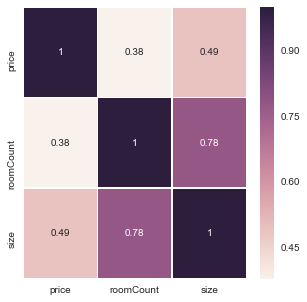

In [48]:
dfCorr = dfPrepared.corr(method='spearman')
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dfCorr, linewidths=.5, ax=ax, annot=True)

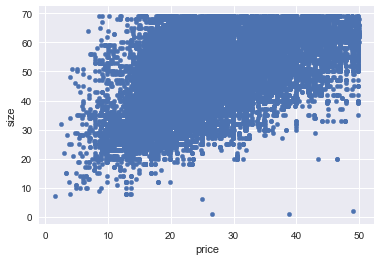

In [47]:
dfPrepared.plot(kind='scatter', x = 'price', y = 'size')